In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
from matplotlib import pyplot as plt
from manual.conv.slide_window import ManualSlideWindowConv
from manual.conv.matmul import ManualMatMulConv
import torch
import time

# 对比不同batchsize的卷积速度

speeds = {
    'manual_matmul': [],
    'manual_slide_window': [],
    'torch': [],
    'torch_cuda': []
}

swConv = ManualSlideWindowConv(kernel_size=3, in_channel=3, out_channel=64,padding=1)
mmConv = ManualMatMulConv(kernel_size=3, in_channel=3, out_channel=64,padding=1)
torchConv = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
torchCudaConv = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1).cuda()


def timing_conv(conv,x):
    start = time.time()
    y = conv(x)
    end = time.time()
    return y, end - start


for bs in [1, 2, 4, 8, 16, 32]:
    x = np.random.randn(bs, 3, 224, 224).astype(np.float32)
    x_torch = torch.from_numpy(x)
    x_torch_cuda = x_torch.cuda()


    y, speed = timing_conv(swConv, x)
    speeds['manual_slide_window'].append(speed)
    print(f'slide_window bs={bs}, speed={speed:.4f}s')
    
    y, speed = timing_conv(mmConv, x)
    speeds['manual_matmul'].append(speed)
    print(f'matmul bs={bs}, speed={speed:.4f}s')
    
    y, speed = timing_conv(torchConv, x_torch)
    speeds['torch'].append(speed)
    print(f'torch bs={bs}, speed={speed:.4f}s')
    
    y, speed = timing_conv(torchCudaConv, x_torch_cuda)
    speeds['torch_cuda'].append(speed)
    print(f'torch_cuda bs={bs}, speed={speed:.4f}s')
    print('-' * 50)
    

slide_window bs=1, speed=39.8342s
matmul bs=1, speed=0.1436s
torch bs=1, speed=0.0080s
torch_cuda bs=1, speed=0.0000s
--------------------------------------------------
slide_window bs=2, speed=39.8841s
matmul bs=2, speed=0.2185s
torch bs=2, speed=0.0172s
torch_cuda bs=2, speed=0.0010s
--------------------------------------------------
slide_window bs=4, speed=44.0416s
matmul bs=4, speed=0.3975s
torch bs=4, speed=0.0329s
torch_cuda bs=4, speed=0.0000s
--------------------------------------------------
slide_window bs=8, speed=41.7520s
matmul bs=8, speed=0.3222s
torch bs=8, speed=0.0588s
torch_cuda bs=8, speed=0.0000s
--------------------------------------------------
slide_window bs=16, speed=45.5278s
matmul bs=16, speed=0.5858s
torch bs=16, speed=0.1067s
torch_cuda bs=16, speed=0.0010s
--------------------------------------------------
slide_window bs=32, speed=58.1965s
matmul bs=32, speed=1.2161s
torch bs=32, speed=0.2045s
torch_cuda bs=32, speed=0.0010s
-----------------------------

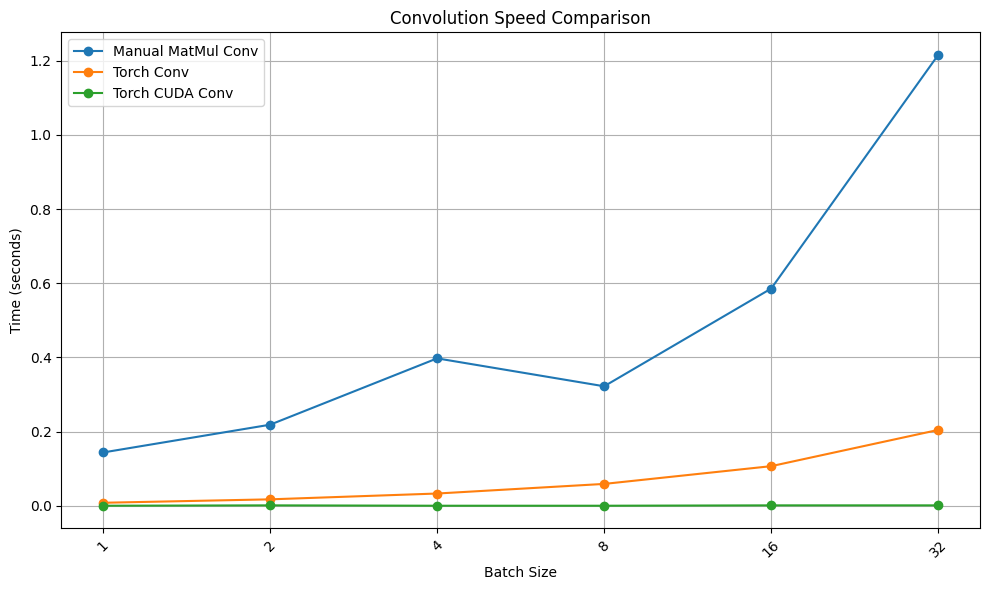

In [10]:
# 绘制速度对比图
plt.figure(figsize=(10, 6))
# plt.plot(speeds['manual_slide_window'], label='Manual Slide Window Conv', marker='o')
plt.plot(speeds['manual_matmul'], label='Manual MatMul Conv', marker='o')
plt.plot(speeds['torch'], label='Torch Conv', marker='o')
plt.plot(speeds['torch_cuda'], label='Torch CUDA Conv', marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Time (seconds)')
plt.title('Convolution Speed Comparison')
plt.xticks(ticks=range(len(speeds['manual_slide_window'])), labels=[str(bs) for bs in [1, 2, 4, 8, 16, 32]], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()